# NY Complaints
### AREAS MOST AFFECTED BY THE TOP COMPLAINT TYPE

In [4]:
body = client_1698e11815c54ccb97bf5cc3f9799953.get_object(Bucket='capstoneproject-donotdelete-pr-i6h4yx7ce352bc',Key='311_Service_Requests_from_2010_to_Present_min.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_3 = pd.read_csv(body)
df_data_3.head()


,Unnamed: 0,Unique Key,Created Date,Closed Date,Complaint Type,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Status,Resolution Description,Borough,Latitude,Longitude
0,0,45531130,02/02/2020 06:09:17 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10019.0,426 WEST 52 STREET,WEST 52 STREET,ADDRESS,NEW YORK,Open,The following complaint conditions are still o...,MANHATTAN,40.765132,-73.988993
1,1,45529784,02/02/2020 02:15:24 PM,NaN,UNSANITARY CONDITION,RESIDENTIAL BUILDING,11204.0,1751 67 STREET,67 STREET,ADDRESS,BROOKLYN,Open,The following complaint conditions are still o...,BROOKLYN,40.618484,-73.992673
2,2,45527528,02/02/2020 02:27:41 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,11372.0,87-15 37 AVENUE,37 AVENUE,ADDRESS,Jackson Heights,Open,The following complaint conditions are still o...,QUEENS,40.750269,-73.879432
3,3,45530329,02/02/2020 12:13:18 PM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10458.0,2405 SOUTHERN BOULEVARD,SOUTHERN BOULEVARD,ADDRESS,BRONX,Open,The following complaint conditions are still o...,BRONX,40.853773,-73.881558
4,4,45528814,02/02/2020 01:59:44 PM,NaN,APPLIANCE,RESIDENTIAL BUILDING,11209.0,223 78 STREET,78 STREET,ADDRESS,BROOKLYN,Open,The following complaint conditions are still o...,BROOKLYN,40.629745,-74.030533


In [17]:
df_data_3.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Complaint Type',
       'Location Type', 'Incident Zip', 'Incident Address', 'Street Name',
       'Address Type', 'City', 'Status', 'Resolution Description', 'Borough',
       'Latitude', 'Longitude'],
      dtype='object')

## Let's drop some columns that we don't need

In [18]:
df_data_3.drop(['Unique Key', 'Resolution Description'], axis=1, inplace=True)

In [19]:
df_data_3.columns

Index(['Created Date', 'Closed Date', 'Complaint Type', 'Location Type',
       'Incident Zip', 'Incident Address', 'Street Name', 'Address Type',
       'City', 'Status', 'Borough', 'Latitude', 'Longitude'],
      dtype='object')

In [20]:
df_data_3.drop(['City', 'Location Type'], axis=1, inplace=True)

In [21]:
df_data_3.columns

Index(['Created Date', 'Closed Date', 'Complaint Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Address Type', 'Status', 'Borough',
       'Latitude', 'Longitude'],
      dtype='object')

In [22]:
df_data_3.drop(['Address Type'], axis=1, inplace=True)

## Now let's look at the cleaned data

In [24]:
df_data_3.head()

,Created Date,Closed Date,Complaint Type,Incident Zip,Incident Address,Street Name,Status,Borough,Latitude,Longitude
0,02/02/2020 06:09:17 AM,NaN,HEAT/HOT WATER,10019.0,426 WEST 52 STREET,WEST 52 STREET,Open,MANHATTAN,40.765132,-73.988993
1,02/02/2020 02:15:24 PM,NaN,UNSANITARY CONDITION,11204.0,1751 67 STREET,67 STREET,Open,BROOKLYN,40.618484,-73.992673
2,02/02/2020 02:27:41 AM,NaN,HEAT/HOT WATER,11372.0,87-15 37 AVENUE,37 AVENUE,Open,QUEENS,40.750269,-73.879432
3,02/02/2020 12:13:18 PM,NaN,HEAT/HOT WATER,10458.0,2405 SOUTHERN BOULEVARD,SOUTHERN BOULEVARD,Open,BRONX,40.853773,-73.881558
4,02/02/2020 01:59:44 PM,NaN,APPLIANCE,11209.0,223 78 STREET,78 STREET,Open,BROOKLYN,40.629745,-74.030533


## Now we are going to see what our value types are

In [25]:
df_data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019843 entries, 0 to 6019842
Data columns (total 10 columns):
Created Date        object
Closed Date         object
Complaint Type      object
Incident Zip        float64
Incident Address    object
Street Name         object
Status              object
Borough             object
Latitude            float64
Longitude           float64
dtypes: float64(3), object(7)
memory usage: 459.3+ MB


## Now we'll see what the complaint types are

In [26]:
#what are the complaint types
df_data_3["Complaint Type"].unique()

array(['HEAT/HOT WATER', 'UNSANITARY CONDITION', 'APPLIANCE', 'GENERAL',
       'ELECTRIC', 'PLUMBING', 'PAINT/PLASTER', 'WATER LEAK', 'SAFETY',
       'DOOR/WINDOW', 'OUTSIDE BUILDING', 'ELEVATOR', 'FLOORING/STAIRS',
       'Unsanitary Condition', 'HPD Literature Request', 'HEATING',
       'PAINT - PLASTER', 'Safety', 'Electric', 'General', 'Appliance',
       'GENERAL CONSTRUCTION', 'NONCONST', 'CONSTRUCTION', 'AGENCY',
       'STRUCTURAL', 'VACANT APARTMENT', 'Outside Building', 'Plumbing',
       'Mold'], dtype=object)

## The sum of each complaint type

In [27]:
#complaint type counts
df_data_3["Complaint Type"].value_counts()

HEAT/HOT WATER            1261574
HEATING                    887850
PLUMBING                   711130
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       451643
PAINT - PLASTER            361257
PAINT/PLASTER              346438
ELECTRIC                   307310
NONCONST                   260890
DOOR/WINDOW                205278
WATER LEAK                 193631
GENERAL                    151308
FLOORING/STAIRS            137402
APPLIANCE                  112831
HPD Literature Request      52824
SAFETY                      51529
OUTSIDE BUILDING             7142
ELEVATOR                     6725
Unsanitary Condition         5499
CONSTRUCTION                 5078
General                      1163
Safety                        424
STRUCTURAL                     16
Plumbing                       11
AGENCY                          9
VACANT APARTMENT                6
Outside Building                6
Appliance                       4
Mold                            1
Electric      

In [28]:
import numpy as np
df_data_3['Complaint Type'] = np.where(df_data_3['Complaint Type']=='HEATING','HEAT/HOT WATER',df_data_3['Complaint Type'])

In [29]:
#new complaint type counts
df_data_3['Complaint Type'].value_counts()

HEAT/HOT WATER            2149424
PLUMBING                   711130
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       451643
PAINT - PLASTER            361257
PAINT/PLASTER              346438
ELECTRIC                   307310
NONCONST                   260890
DOOR/WINDOW                205278
WATER LEAK                 193631
GENERAL                    151308
FLOORING/STAIRS            137402
APPLIANCE                  112831
HPD Literature Request      52824
SAFETY                      51529
OUTSIDE BUILDING             7142
ELEVATOR                     6725
Unsanitary Condition         5499
CONSTRUCTION                 5078
General                      1163
Safety                        424
STRUCTURAL                     16
Plumbing                       11
AGENCY                          9
Outside Building                6
VACANT APARTMENT                6
Appliance                       4
Mold                            1
Electric                        1
Name: Complain

In [30]:
#let's see in a graph
import matplotlib.pyplot as plt
df_data_3["Complaint Type"].value_counts().plot(kind='bar', figsize=(10, 6))
#
plt.xlabel('Complaint_Type') # add to x-label to the plot
plt.ylabel('Number occurance') # add y-label to the plot
plt.title('Complaint Type Graph') # add title to the plot
#
plt.show()

<Figure size 1000x600 with 1 Axes>

In [31]:
Q2_df = df_data_3[["Complaint Type", "Borough", "Street Name", "Incident Zip"]]

In [32]:
Q2_df.head()

,Complaint Type,Borough,Street Name,Incident Zip
0,HEAT/HOT WATER,MANHATTAN,WEST 52 STREET,10019.0
1,UNSANITARY CONDITION,BROOKLYN,67 STREET,11204.0
2,HEAT/HOT WATER,QUEENS,37 AVENUE,11372.0
3,HEAT/HOT WATER,BRONX,SOUTHERN BOULEVARD,10458.0
4,APPLIANCE,BROOKLYN,78 STREET,11209.0


## Let's show the columns with no values

In [33]:
Q2_df.isnull().sum()

Complaint Type        0
Borough               0
Street Name       52825
Incident Zip      80697
dtype: int64

In [34]:
Q2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019843 entries, 0 to 6019842
Data columns (total 4 columns):
Complaint Type    object
Borough           object
Street Name       object
Incident Zip      float64
dtypes: float64(1), object(3)
memory usage: 183.7+ MB


## Now we are going show only the complaints that have to do with HEAT/HOT WATER and see which Borough has the most

In [38]:
#drop other complaint types other than Heat/Hot Water (most complaint type)
Q2_df = Q2_df[Q2_df['Complaint Type'] == "HEAT/HOT WATER"]
Q2_df.head()

,Complaint Type,Borough,Street Name,Incident Zip
0,HEAT/HOT WATER,MANHATTAN,WEST 52 STREET,10019.0
2,HEAT/HOT WATER,QUEENS,37 AVENUE,11372.0
3,HEAT/HOT WATER,BRONX,SOUTHERN BOULEVARD,10458.0
5,HEAT/HOT WATER,BRONX,MORRIS AVENUE,10456.0
7,HEAT/HOT WATER,QUEENS,81 STREET,11372.0


In [39]:
#now, we can count for borough, street name and incident zip as follows;
Q2_df["Borough"].value_counts()

BRONX            606133
BROOKLYN         574845
MANHATTAN        423039
Unspecified      282917
QUEENS           244122
STATEN ISLAND     18368
Name: Borough, dtype: int64

In [41]:
Q2_df.loc[df_data_3['Borough'] == "Unspecified"].head() #see which columns have unspecified boroughs

,Complaint Type,Borough,Street Name,Incident Zip
177399,HEAT/HOT WATER,Unspecified,WEST 173 STREET,10032.0
177400,HEAT/HOT WATER,Unspecified,NEW YORK AVENUE,11210.0
177401,HEAT/HOT WATER,Unspecified,NEW YORK AVENUE,11210.0
177402,HEAT/HOT WATER,Unspecified,HOMECREST AVENUE,11235.0
177403,HEAT/HOT WATER,Unspecified,EAST 115 STREET,10029.0


## Visualize HEAT/HOT WATER incidents by Borough

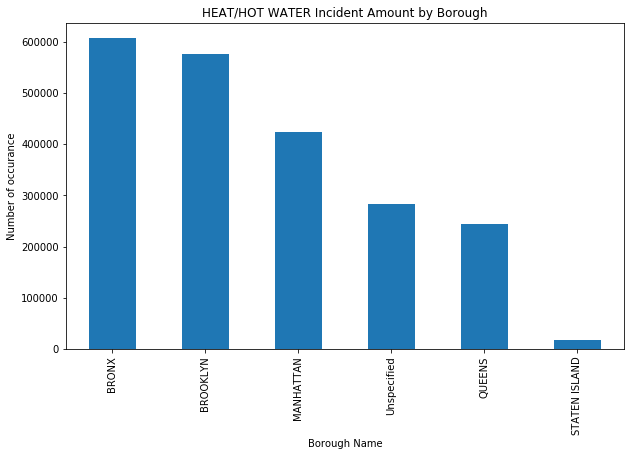

In [42]:
Q2_df["Borough"].value_counts().plot(kind='bar', figsize=(10, 6))
#
plt.xlabel('Borough Name') # add to x-label to the plot
plt.ylabel('Number of occurance') # add y-label to the plot
plt.title('HEAT/HOT WATER Incident Amount by Borough') # add title to the plot
#
plt.show()

## The street with the most HEAT/HOT WATER incidents

In [43]:
#finding the street where HEAT/HOT Water problem occured mostly
Q2_df["Street Name"].value_counts().head()

GRAND CONCOURSE    37863
BROADWAY           24484
OCEAN AVENUE       18716
MORRIS AVENUE      16409
ARDEN STREET       15963
Name: Street Name, dtype: int64

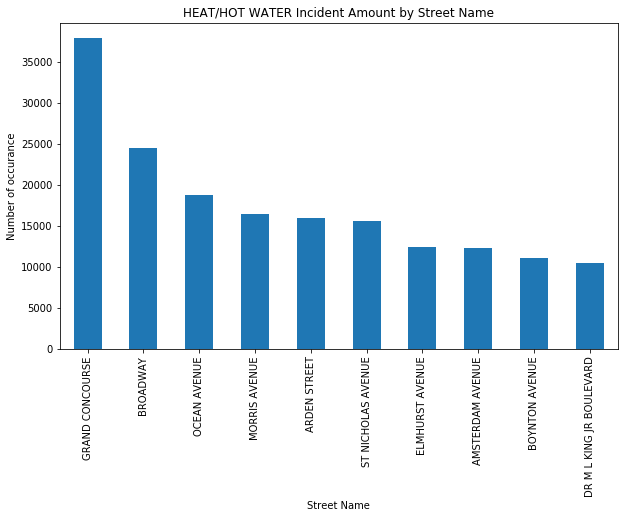

In [44]:
Q2_df["Street Name"].value_counts().head(10).plot(kind='bar', figsize=(10, 6))
#
plt.xlabel('Street Name') # add to x-label to the plot
plt.ylabel('Number of occurance') # add y-label to the plot
plt.title('HEAT/HOT WATER Incident Amount by Street Name') # add title to the plot
#
plt.show()

## Now let's find the ZIP code with the most HEAT/HOT WATER incidents

In [45]:
#finding the zip number where HEAT/HOT Water problem occured mostly
Q2_df["Incident Zip"].value_counts().head()

11226.0    69041
10467.0    66073
10458.0    65372
10468.0    58190
10453.0    57818
Name: Incident Zip, dtype: int64

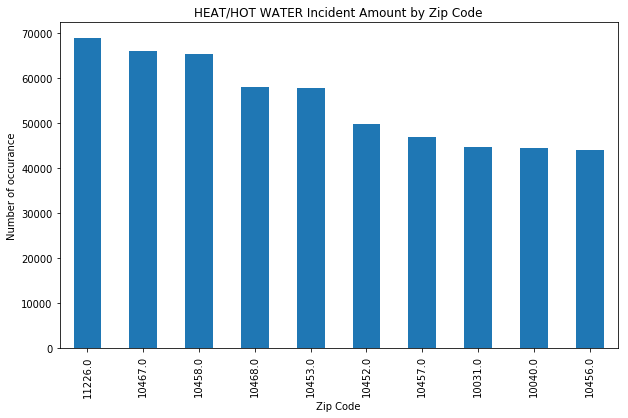

In [46]:
Q2_df["Incident Zip"].value_counts().head(10).plot(kind='bar', figsize=(10, 6))
#
plt.xlabel('Zip Code') # add to x-label to the plot
plt.ylabel('Number of occurance') # add y-label to the plot
plt.title('HEAT/HOT WATER Incident Amount by Zip Code') # add title to the plot
#
plt.show()

In [49]:
df_data_3.loc[df_data_3['Street Name'] == "GRAND CONCOURSE"].head()

,Created Date,Closed Date,Complaint Type,Incident Zip,Incident Address,Street Name,Status,Borough,Latitude,Longitude
27,02/02/2020 07:20:04 PM,NaN,WATER LEAK,10458.0,2902 GRAND CONCOURSE,GRAND CONCOURSE,Open,BRONX,40.871149,-73.889257
63,02/02/2020 11:56:06 PM,NaN,HEAT/HOT WATER,10453.0,2095 GRAND CONCOURSE,GRAND CONCOURSE,Open,BRONX,40.853858,-73.902469
68,02/02/2020 10:39:56 PM,NaN,HEAT/HOT WATER,10458.0,2664 GRAND CONCOURSE,GRAND CONCOURSE,Open,BRONX,40.866405,-73.894114
77,02/02/2020 10:49:43 PM,NaN,HEAT/HOT WATER,10468.0,2715 GRAND CONCOURSE,GRAND CONCOURSE,Open,BRONX,40.867480,-73.893320
78,02/02/2020 10:35:10 PM,NaN,HEAT/HOT WATER,10453.0,2095 GRAND CONCOURSE,GRAND CONCOURSE,Open,BRONX,40.853858,-73.902469


In [51]:
df_data_3.loc[df_data_3['Incident Zip'] == 11226.0].head()

,Created Date,Closed Date,Complaint Type,Incident Zip,Incident Address,Street Name,Status,Borough,Latitude,Longitude
6,02/02/2020 11:13:42 PM,NaN,GENERAL,11226.0,180 LENOX ROAD,LENOX ROAD,Open,BROOKLYN,40.653911,-73.953804
14,02/02/2020 04:09:57 PM,NaN,HEAT/HOT WATER,11226.0,297 LENOX ROAD,LENOX ROAD,Open,BROOKLYN,40.654202,-73.949260
115,02/02/2020 01:41:09 PM,NaN,HEAT/HOT WATER,11226.0,2305 BEDFORD AVENUE,BEDFORD AVENUE,Open,BROOKLYN,40.647447,-73.955697
125,02/02/2020 02:36:49 PM,NaN,HEAT/HOT WATER,11226.0,1 PARADE PLACE,PARADE PLACE,Open,BROOKLYN,40.653091,-73.966134
187,02/02/2020 05:07:51 PM,NaN,PLUMBING,11226.0,2505 BEDFORD AVENUE,BEDFORD AVENUE,Open,BROOKLYN,40.642215,-73.954443


In [52]:
#CONCLUDING REMARKS
#BRONX is the borough which has the most HEAT/HOT WATER incident with 606133 incidents and BROOKLYN is following with 574845 incidents.
#GRAND CONCOURSE is the street which has the most HEAT/HOT WATER incident with 37863 incidents. GRAND CONCOURSE street is in BRONX
#11226 is the Zip Code which has the most HEAT/HOT WATER incident with 69041 incidents and it belongs to BROOKLYN

## CONCLUDING REMARKS 

Bronx is the borough which has the most HEAT/HOT WATER incident with 606133 incidents and Brooklyn is following with 574845 incidents.

Grand Concourse is the street which has the most HEAT/HOT WATER incident with 37863 incidents. Grand Concourse street is in Bronx.

11226 is the Zip Code which has the most HEAT/HOT WATER incident with 69041 incidents and it belongs to Brooklyn